#### Abstract

Import the necessary libraries for work.

In [195]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Determine time step and time range variables.

In [196]:
dt = 0.001
t = np.arange(0,1, dt)
l = len(t)

#### Plotting original sine waves

Plot the sine wave of periodicity of 10 Hz and 50 Hz.

In [197]:
freq1 = 10
freq2 = 50

Implement a handy way to represnt multiple plots at once:

In [200]:
def multiPlot(*f: object):
    lf = len(f)
    fig, axs = plt.subplots(lf, 1)

    for i in f:
        lf = lf-1
        plt.sca(axs[lf])
        plt.plot(t, i[0], color='navy', linewidth=1, label=i[1], )
        plt.xlim(t[0], t[-1])
        plt.ylabel(i[1])
        plt.legend()

    plt.show()

#### Sine waves 
Plot actually the necessary stochastic signals and their sum

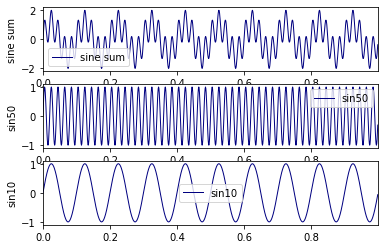

In [201]:
def functFreq10():
    return np.sin(2 * np.pi * freq1 * t), 'sin10'


def functFreq50():
    return np.sin(2 * np.pi * freq2 * t), 'sin50'


def functSumClean():
    return functFreq10()[0] + functFreq50()[0], 'sine sum'

multiPlot(functFreq10(), functFreq50(), functSumClean())

#### Gaussian Noise
Then the Gaussian noise is added to the summarized signal `sineSum` in order to get a distorted signal.

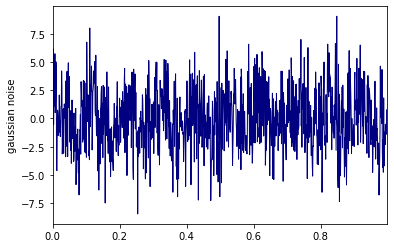

In [202]:
def functSumNoise():
    f = functSumClean()[0]
    f += 2.5 * np.random.randn(l)
    return  f, 'gaussian noise'

def singlePlot(f):
    plt.plot(t, f[0], color='navy', linewidth=1, label=f[1], )
    plt.xlim(t[0], t[-1])
    plt.ylabel(f[1])
    plt.show()

singlePlot(functSumNoise())

This noise then will be attempted to be filtered out and restored to it's original denoised state. 

### Fast Fourier Transform (FFT)

To be able to generate Fourier Series from a finite range the Discrete Fourier Transformation algorithm should be used.
In order to process large data sets in a more efficient way the Fast Fourier Algorithm is used.

Generate a Fourier series from the distorted signal `signalNoise` using the NumPy method for Fast Fourier Transform.

Confirm that the Fourier Series indeed were generated by examining the first 10 results from the variable **fftSignalNoise**

In [149]:

fourier = np.fft.fft(functSumNoise()[0], len(t))

i = 0
for line in fourier:
    if (10 == i):
        break
    print(line)
    i += 1

(-87.89016458041304+0j)
(94.48410423339885-9.1082411148749j)
(38.2921552900948-32.950705246530795j)
(-102.21982467754549+57.3736579486704j)
(-36.79025719647248-58.90114406224857j)
(62.250779019880305-64.18579392133208j)
(47.76563565534911+85.45922141756269j)
(29.690882948517633+147.15927614502834j)
(31.99873175277081+41.93748855206315j)
(44.18521435049792-67.49652270768223j)


#### Power Spectral Density

Calculate the power spectral density for the distorted signal.
Show the power distribution over time range.

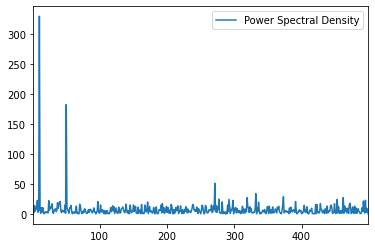

In [150]:
spectrum = fourier * np.conj(fourier)/l

frequencies = (1/(dt*l))* np.arange(l)
L = np.arange(1, np.floor(l/2), dtype='int')

plt.plot(frequencies[L], np.real(spectrum[L]), label='Power Spectral Density')
plt.xlim(frequencies[L[0]], frequencies[L[-1]])
plt.legend()
plt.show()

#### High-pass filter

Apply the high-pass filter to the psd based on historgram observations.

Make sense to use a value > 150.

After filtering the peaks multiple with original "PSD" in order to disable the rest.

In [151]:
idx = spectrum > 150
new_spectrum = spectrum * idx

Filter the fourier transformation values of the correspoinding indices.

In [152]:
filter_fourier = fourier * idx

Thus, there should be only the values left corresponding the chosen picks from PSD.

Finaly, apply inverse fourier transform to the filtered fourier transform series in order to restore the signal.

In [153]:
def filterIfourier():
    ifourier = np.fft.fft(filter_fourier, l)
    return np.real(ifourier)

Plot the resulted inverse fourier to compare optically the resulted signal to the initial one.

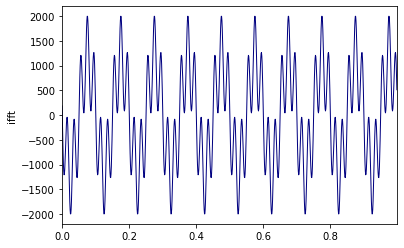

In [154]:
singlePlot((filterIfourier(), 'ifft') )

To compare the resulted inverse fourier transform with the original signal.

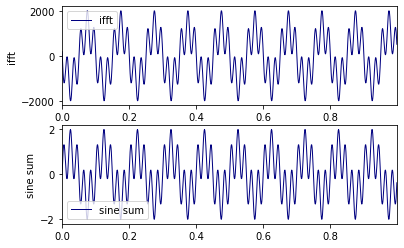

In [155]:
multiPlot(functSumClean(), (filterIfourier(), 'ifft') )

#### Conclusion


#### Nyquist Theorem

#### Abstract

The Nyquist-Shannon theorem states that while the Fourier Transformation the signal can be properly
reconstructed if the sampling performed using at least twice the frequency of the signal.

It means that for a signal sampling of duration T and the maximum frequency w(omega) the resulted minimum values should
be 2Tw.

Otherwise, the "aliasing" effect occurs in case of under-sampling process.

Let's choose a frequency rate of 20 Hz and plot ta cosines function:

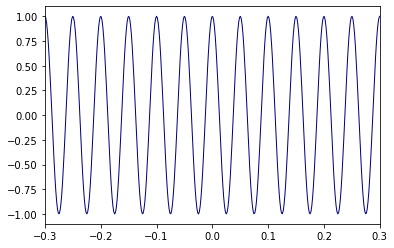

In [156]:
w = 20
tp = 0.3
t = np.linspace(-tp, tp, 400)
fcos = np.cos(2*np.pi*w*t)

def single_signal_plot(time, f):
    plt.plot(time, f, color='navy', linewidth=1, label=f[1], )
    plt.xlim(time[0], time[-1])
    plt.show()

single_signal_plot(t, fcos)

The signal sampled now using the Nyquist-Shannon rate which is 1/(2*w)

In [157]:
Nw = 1/(2*w)

And it's necessary to calculate a new time range for the frequency.

In [158]:
min = np.ceil(-tp/Nw)
max = np.floor(tp/Nw)

n = np.arange(min, max)

Let's plot the sampled signal with Nyquist rate applied.

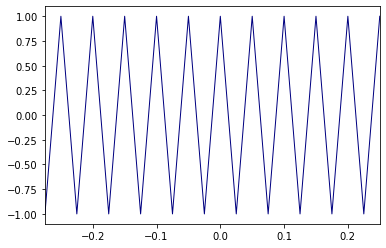

In [159]:
fcosN = np.cos(2 * np.pi * w * Nw * n)

single_signal_plot(n * Nw, fcosN)

It can be observed the resulted signals mimics the original in frequency and amplitude.

We now attempt to sample  the original signal using the rate lower than the one determined by Nyquist-Shannon Theorem.

In [160]:
fLow = 1/25

min = np.ceil(-tp/fLow)
max = np.floor(tp/fLow)

n = np.arange(min, max)

fLowCos = np.cos(2 * np.pi * w * fLow * n)

Plot the undersampled signal accordingly

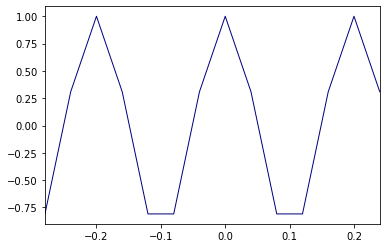

In [161]:
single_signal_plot(n * fLow, fLowCos)

#### Conclusion
Clearly the sampled signal resulted in significant informational losses thus affected by the
principle called aliasing.


### Convolution
Using the previous example fo the distroted signal, lets finds a convolution sum using arbitrary unit impulse value:

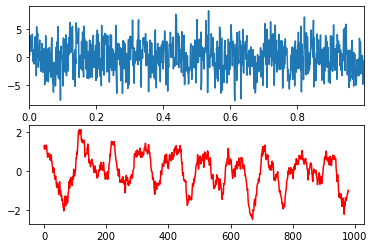

In [206]:
function_noise = functSumNoise()[0]
avg = np.ones(20)
avg /= sum(avg)

conv = np.convolve(function_noise, avg, mode='valid')

fg, ax = plt.subplots(2, 1)

plt.sca(ax[0])
plt.xlim(t[0], t[-1])
plt.plot(t, function_noise)

plt.sca(ax[1])
plt.plot(conv, color='red')

plt.show()